<a href="https://colab.research.google.com/github/ImmortalizedInHearts/NeuralNetwork/blob/main/NNTwoLayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

from tqdm import tqdm

In [4]:
mat = scipy.io.loadmat('data.mat')
trainInputs = np.array(mat['data']['test'][0][0][0][0][0])
trainTargets = np.array(mat['data']['test'][0][0][0][0][1])

testInputs = np.array(mat['data']['training'][0][0][0][0][0])
testTargets = np.array(mat['data']['training'][0][0][0][0][1])

validationInputs = np.array(mat['data']['validation'][0][0][0][0][1])
validationTargets = np.array(mat['data']['validation'][0][0][0][0][0])

In [5]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def softmax(x):
  return np.exp(x) / np.exp(x).sum(axis=0)

def crossEntropyLoss(y_true, y_pred):
  loss = -y_true[y_true == 1] @ np.log(y_pred[y_true == 1] + 1e-15)
  return loss / len(y_true)

def targetsSearch(data):
  predict = NN.feedforward(data)[1]
  return [np.argmax(item) for item in predict.T]


In [6]:
class NeuralNetwork:

  def __init__(self, k):

    self.k = k

    self.loss = list()
  
  def feedforward(self, data):
    h = sigmoid(self.k[0] @ data)
    y = softmax(self.k[1] @ h)
    return [h,y]
  
  def train(self, data, y_true):
    alpha = 0.01
    epochs = 1000

    for epoch in tqdm(range(epochs)):

      forward = self.feedforward(data) 
      hidden = forward[0]
      predict = forward[1]

      """backprop"""
      derivLoss = -y_true / predict
      derivSoftmax = predict * (derivLoss - (derivLoss * predict).sum(axis=0))
      dL_dk2 = derivSoftmax @ hidden.T
      

      derivHidden = self.k[1].T @ derivSoftmax
      derivSigmoid = hidden * (1 - hidden) * derivHidden
      dL_dk1 = derivSigmoid @ data.T 
      

      self.k[0] -= alpha * dL_dk1 / len(data)
      self.k[1] -= alpha * dL_dk2 / len(data)

      self.loss.append(crossEntropyLoss(y_true.T, predict.T))

In [7]:
kParameters = [np.random.randn(128, 256) * np.sqrt(2/256), np.random.randn(10, 128) * np.sqrt(2/128)]
NN = NeuralNetwork(kParameters)
NN.train(trainInputs, trainTargets)

100%|██████████| 1000/1000 [01:49<00:00,  9.12it/s]


In [8]:
confMatrixTest = [[0 for i in range(10)] for j in range(10)]
confMatrixTrain = [[0 for i in range(10)] for j in range(10)]
confMatrixValidation = [[0 for i in range(10)] for j in range(10)]

testPredictions = targetsSearch(testInputs)
validationPredictions = targetsSearch(validationInputs)
trainPredictions = targetsSearch(trainInputs)


for index in range(len(trainPredictions)):
  if index < 1000:
    confMatrixTest[np.argmax(testTargets.T[index])][testPredictions[index]] += 1
    confMatrixValidation[np.argmax(validationTargets.T[index])][validationPredictions[index]] += 1
  confMatrixTrain[np.argmax(trainTargets.T[index])][trainPredictions[index]] += 1

In [9]:
print(np.mean([confMatrixTest[i][i] for i in range(10)]))
confMatrixTest

93.8


[[92, 1, 0, 0, 1, 1, 0, 1, 4, 0],
 [1, 97, 0, 0, 0, 0, 0, 0, 2, 0],
 [1, 1, 92, 0, 0, 0, 4, 0, 2, 0],
 [1, 0, 0, 91, 0, 3, 1, 0, 3, 1],
 [0, 1, 0, 0, 92, 0, 2, 0, 0, 5],
 [1, 1, 0, 2, 0, 92, 1, 0, 3, 0],
 [0, 0, 1, 0, 2, 0, 97, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 98, 0, 2],
 [0, 2, 0, 0, 0, 1, 0, 1, 96, 0],
 [0, 1, 1, 0, 4, 0, 0, 2, 1, 91]]

In [10]:
print(np.mean([confMatrixValidation[i][i] for i in range(10)]))
confMatrixValidation

94.9


[[95, 0, 0, 0, 2, 0, 1, 0, 2, 0],
 [0, 97, 0, 1, 0, 0, 0, 0, 2, 0],
 [0, 0, 93, 1, 1, 0, 1, 0, 4, 0],
 [0, 0, 1, 94, 0, 4, 0, 0, 1, 0],
 [0, 1, 0, 0, 95, 0, 4, 0, 0, 0],
 [1, 1, 2, 3, 0, 90, 0, 1, 2, 0],
 [0, 1, 1, 0, 2, 0, 96, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 96, 0, 4],
 [0, 1, 0, 0, 2, 1, 0, 0, 96, 0],
 [0, 0, 0, 1, 1, 0, 0, 1, 0, 97]]

In [11]:
print(np.sum([confMatrixTrain[i][i] for i in range(10)]) / trainTargets.shape[1] * 100)
confMatrixTrain

95.72222222222221


[[879, 3, 1, 1, 6, 4, 4, 0, 2, 0],
 [2, 869, 1, 7, 4, 0, 3, 3, 11, 0],
 [6, 7, 836, 7, 4, 9, 15, 3, 10, 3],
 [3, 0, 14, 839, 0, 22, 3, 8, 8, 3],
 [0, 5, 2, 0, 874, 0, 7, 1, 0, 11],
 [6, 2, 2, 17, 3, 856, 4, 3, 7, 0],
 [6, 7, 3, 0, 7, 2, 875, 0, 0, 0],
 [0, 2, 0, 1, 1, 0, 0, 880, 0, 16],
 [3, 14, 5, 5, 2, 19, 1, 2, 844, 5],
 [2, 2, 0, 0, 10, 1, 0, 17, 5, 863]]

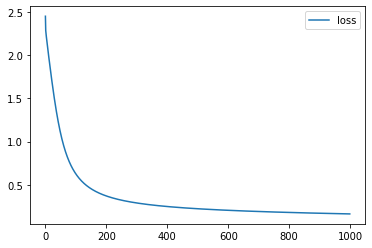

In [12]:
plt.plot(NN.loss, label='loss')
plt.legend()